In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
data_path = '/home/u/qqaazz800624/manafaln-oxr/cardiovascular-calcification/radiomics/data/radiomics_simplified.csv'
cac_path = '/home/u/qqaazz800624/manafaln-oxr/cardiovascular-calcification/radiomics/data/CAC_scores.csv'
data_all_path = '/home/u/qqaazz800624/manafaln-oxr/cardiovascular-calcification/radiomics/data/df_all.csv'

df = pd.read_csv(data_path)
df_cac = pd.read_csv(cac_path)
df_all = pd.read_csv(data_all_path)

In [3]:
X, y = df_all.drop(columns=['Unnamed: 0','uid','cac_score']), df_all['cac_score']

In [20]:
df_all.loc[df_all['cac_score'] > 400, 'Y'] = 1
df_all.loc[df_all['cac_score'] <= 400, 'Y'] = 0

In [23]:
df_all['Y'].count()

200

In [4]:
data_matrix = xgb.DMatrix(data=X, label=y)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [7]:
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror',
                    colsample_bytree = 0.3,
                    learning_rate = 0.1,
                    max_depth = 5,
                    alpha = 10,
                    n_estimators = 10)

xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [8]:
import numpy as np

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("RMSE: %f" % (rmse))

RMSE: 622.695850


In [9]:
xgb_acc = xg_reg.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  -14.371966089884914


[12:20:08] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



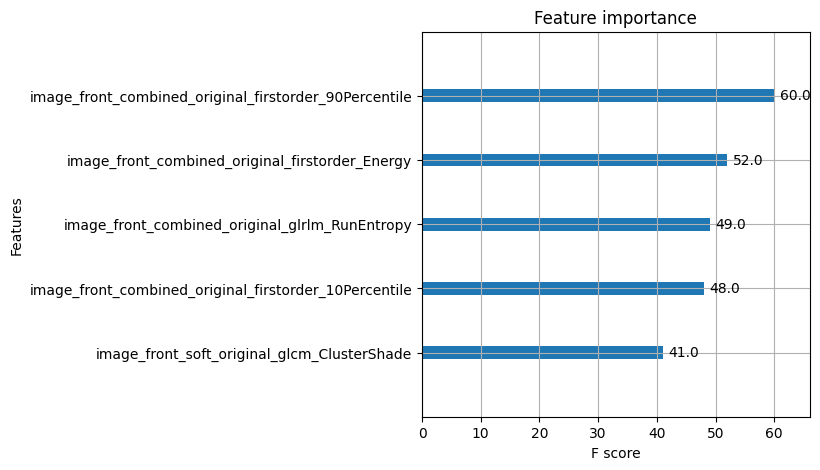

In [11]:
params = {
    "objective": "reg:squarederror",
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10,
    'silent': 1
}

xg_reg = xgb.train(params=params, dtrain=data_matrix, num_boost_round=200)

import matplotlib.pyplot as plt
ax = xgb.plot_importance(xg_reg, max_num_features=5)
plt.rcParams['figure.figsize'] = [5,5]

fig = ax.get_figure()

In [3]:
cols = ['image_front_combined_original_firstorder_Energy','image_front_soft_original_firstorder_Energy','image_front_hard_original_firstorder_Energy']
energy = df[cols]
energy.describe()

,image_front_combined_original_firstorder_Energy,image_front_soft_original_firstorder_Energy,image_front_hard_original_firstorder_Energy
count,200.000000,200.000000,200.000000
mean,8582.929642,10692.426661,2087.924036
std,1835.045240,3042.191648,1374.616653
min,4942.829112,1417.632755,173.296607
25%,7416.804828,8734.071635,1176.726609
50%,8478.134402,10602.699450,1661.343119
75%,9572.297261,12388.164010,2596.596170
max,13839.940740,21400.897870,8080.291483


In [5]:
a = energy['image_front_soft_original_firstorder_Energy']
b = energy['image_front_hard_original_firstorder_Energy']

t, p = ttest_ind(a, b, equal_var=False)

In [7]:
p

1.0451761624194747e-107

array([[<Axes: title={'center': 'image_front_combined_original_firstorder_Energy'}>]],
      dtype=object)

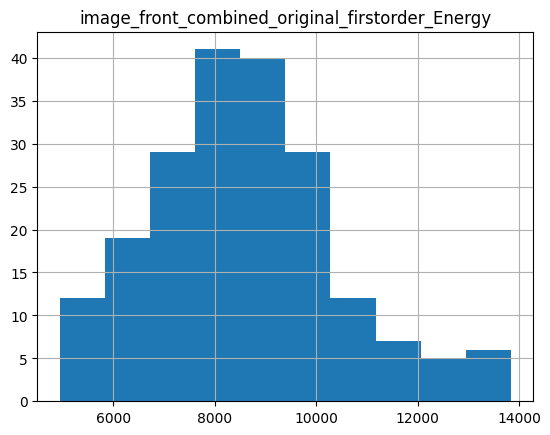

In [6]:
energy.hist(column='image_front_combined_original_firstorder_Energy')

array([[<Axes: title={'center': 'image_front_combined_original_firstorder_Energy'}>],
       [<Axes: title={'center': 'image_front_soft_original_firstorder_Energy'}>],
       [<Axes: title={'center': 'image_front_hard_original_firstorder_Energy'}>]],
      dtype=object)

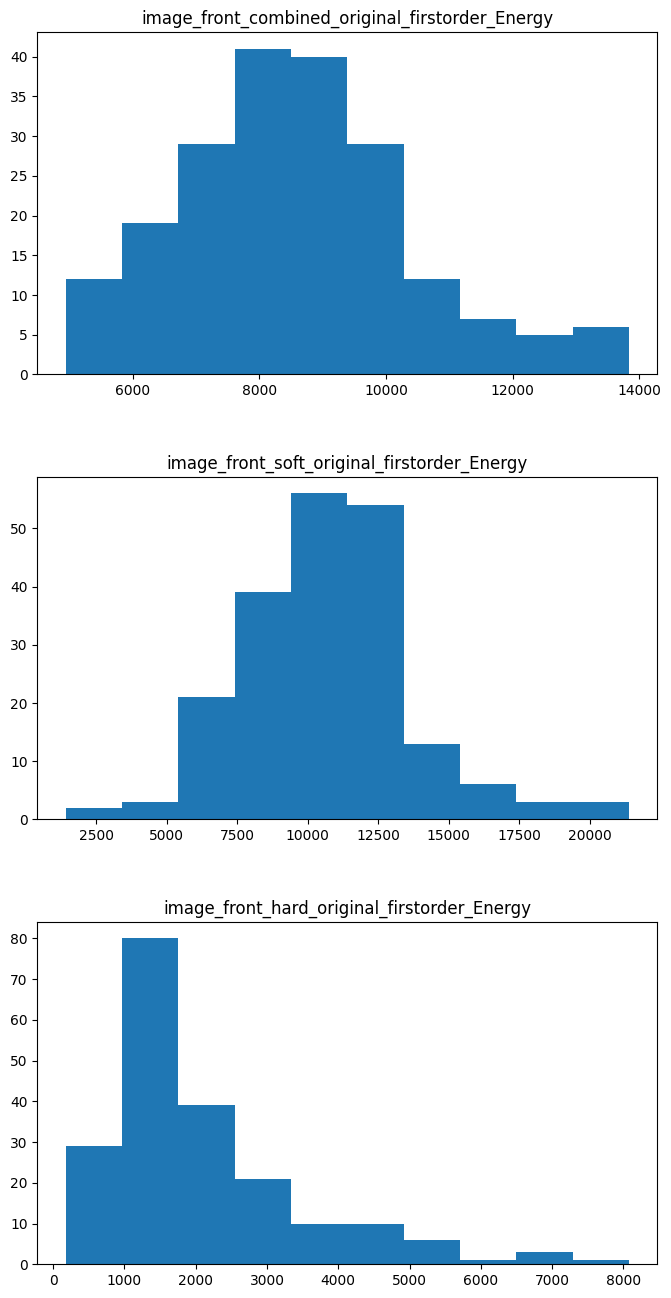

In [10]:
energy.hist(layout=(3,1), figsize=(8,16),grid=False)